# Разведочный анализ данных. Исследование и визуализация данных.

## 1) Текстовое описание набора данных

В качестве набора данных мы будем использовать набор данных 
по исследованию сахарного диабета - https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

Эта задача является очень актуальной для медицины, ведь позволяет выявить более подверженные риску группы людей, а значит и оптимизировать процесс поиска лекарства

Датасет содержит следующие колонки:
- AGE - Возраст пациента
- SEX - Пол (0/1)
- BMI - Индекс массы тела
- BP - Среднее кровяное давление
- S1-S6 - Измерения шести кровяных сывороток
- Y -  количественная мера прогрессирования заболевания через год после базового уровня

# Импорт библиотек

In [56]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

# Загрузка данных

In [57]:
# Будем анализировать данные только на обучающей выборке
data = pd.read_csv('diabetes.txt', sep="\t")

# 2) Основные характеристики датасета

In [58]:
# Первые 5 строк датасета
data.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


In [59]:
# Размер датасета - 8143 строк, 7 колонок
data.shape

(442, 11)

Размер датасета- 442 строки и 11 колонок

In [60]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 442


In [61]:
# Список колонок
data.columns

Index(['AGE', 'SEX', 'BMI', 'BP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'Y'], dtype='object')

In [62]:
# Список колонок с типами данных
data.dtypes

AGE      int64
SEX      int64
BMI    float64
BP     float64
S1       int64
S2     float64
S3     float64
S4     float64
S5     float64
S6       int64
Y        int64
dtype: object

In [63]:
# Проверим наличие пустых значений
# Цикл по колонкам датасета
for col in data.columns:
    # Количество пустых значений - все значения заполнены
    temp_null_count = data[data[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

AGE - 0
SEX - 0
BMI - 0
BP - 0
S1 - 0
S2 - 0
S3 - 0
S4 - 0
S5 - 0
S6 - 0
Y - 0


In [64]:
# Основные статистические характеристки набора данных
data.describe()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,48.518100,1.468326,26.375792,94.647014,189.140271,115.439140,49.788462,4.070249,4.641411,91.260181,152.133484
std,13.109028,0.499561,4.418122,13.831283,34.608052,30.413081,12.934202,1.290450,0.522391,11.496335,77.093005
min,19.000000,1.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,58.000000,25.000000
25%,38.250000,1.000000,23.200000,84.000000,164.250000,96.050000,40.250000,3.000000,4.276700,83.250000,87.000000
50%,50.000000,1.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,4.620050,91.000000,140.500000
75%,59.000000,2.000000,29.275000,105.000000,209.750000,134.500000,57.750000,5.000000,4.997200,98.000000,211.500000
max,79.000000,2.000000,42.200000,133.000000,301.000000,242.400000,99.000000,9.090000,6.107000,124.000000,346.000000


# 3) Визуальное исследование датасета

### [Диаграмма рассеяния](https://en.wikipedia.org/wiki/Scatter_plot)





AxesSubplot(0.125,0.125;0.775x0.755)


<AxesSubplot:xlabel='BMI', ylabel='AGE'>

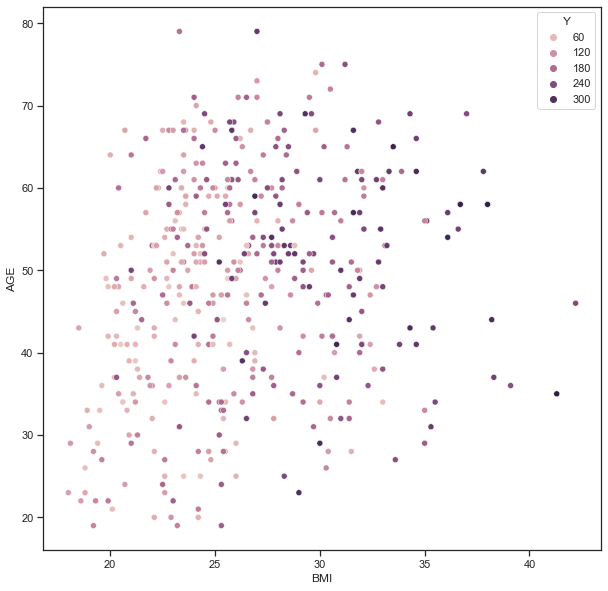

In [65]:
fig, ax = plt.subplots(figsize=(10,10)) 
print(ax)
sns.scatterplot(ax=ax, x='BMI', y='AGE', data=data, hue = 'Y')

Можно видеть что между полями AGE и BMI почти отсутствуетлинейная зависимость и целевой признак на нее практически не влияет.

## [Гистограмма](https://en.wikipedia.org/wiki/Histogram) 
Позволяет оценить плотность вероятности распределения давления у пациентов.

D:\SOFT\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='BP', ylabel='Density'>

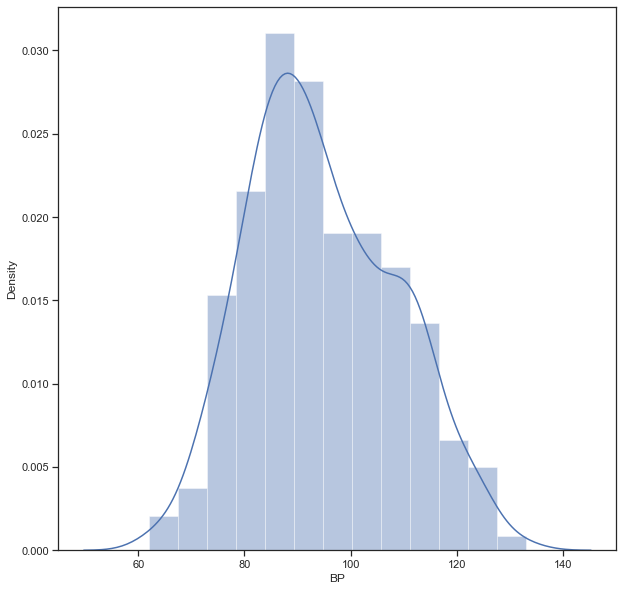

In [66]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.distplot(data['BP'])

### Jointplot
Комбинация гистограмм и диаграмм рассеивания.

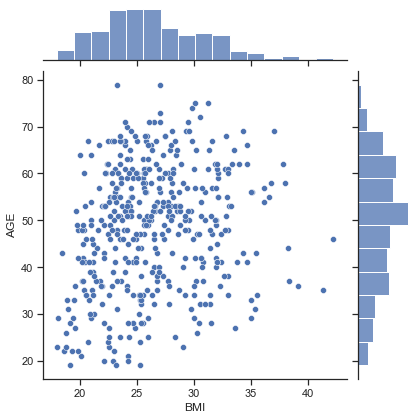

In [67]:
sns.jointplot(x='BMI', y='AGE', data=data)

### "Парные диаграммы"


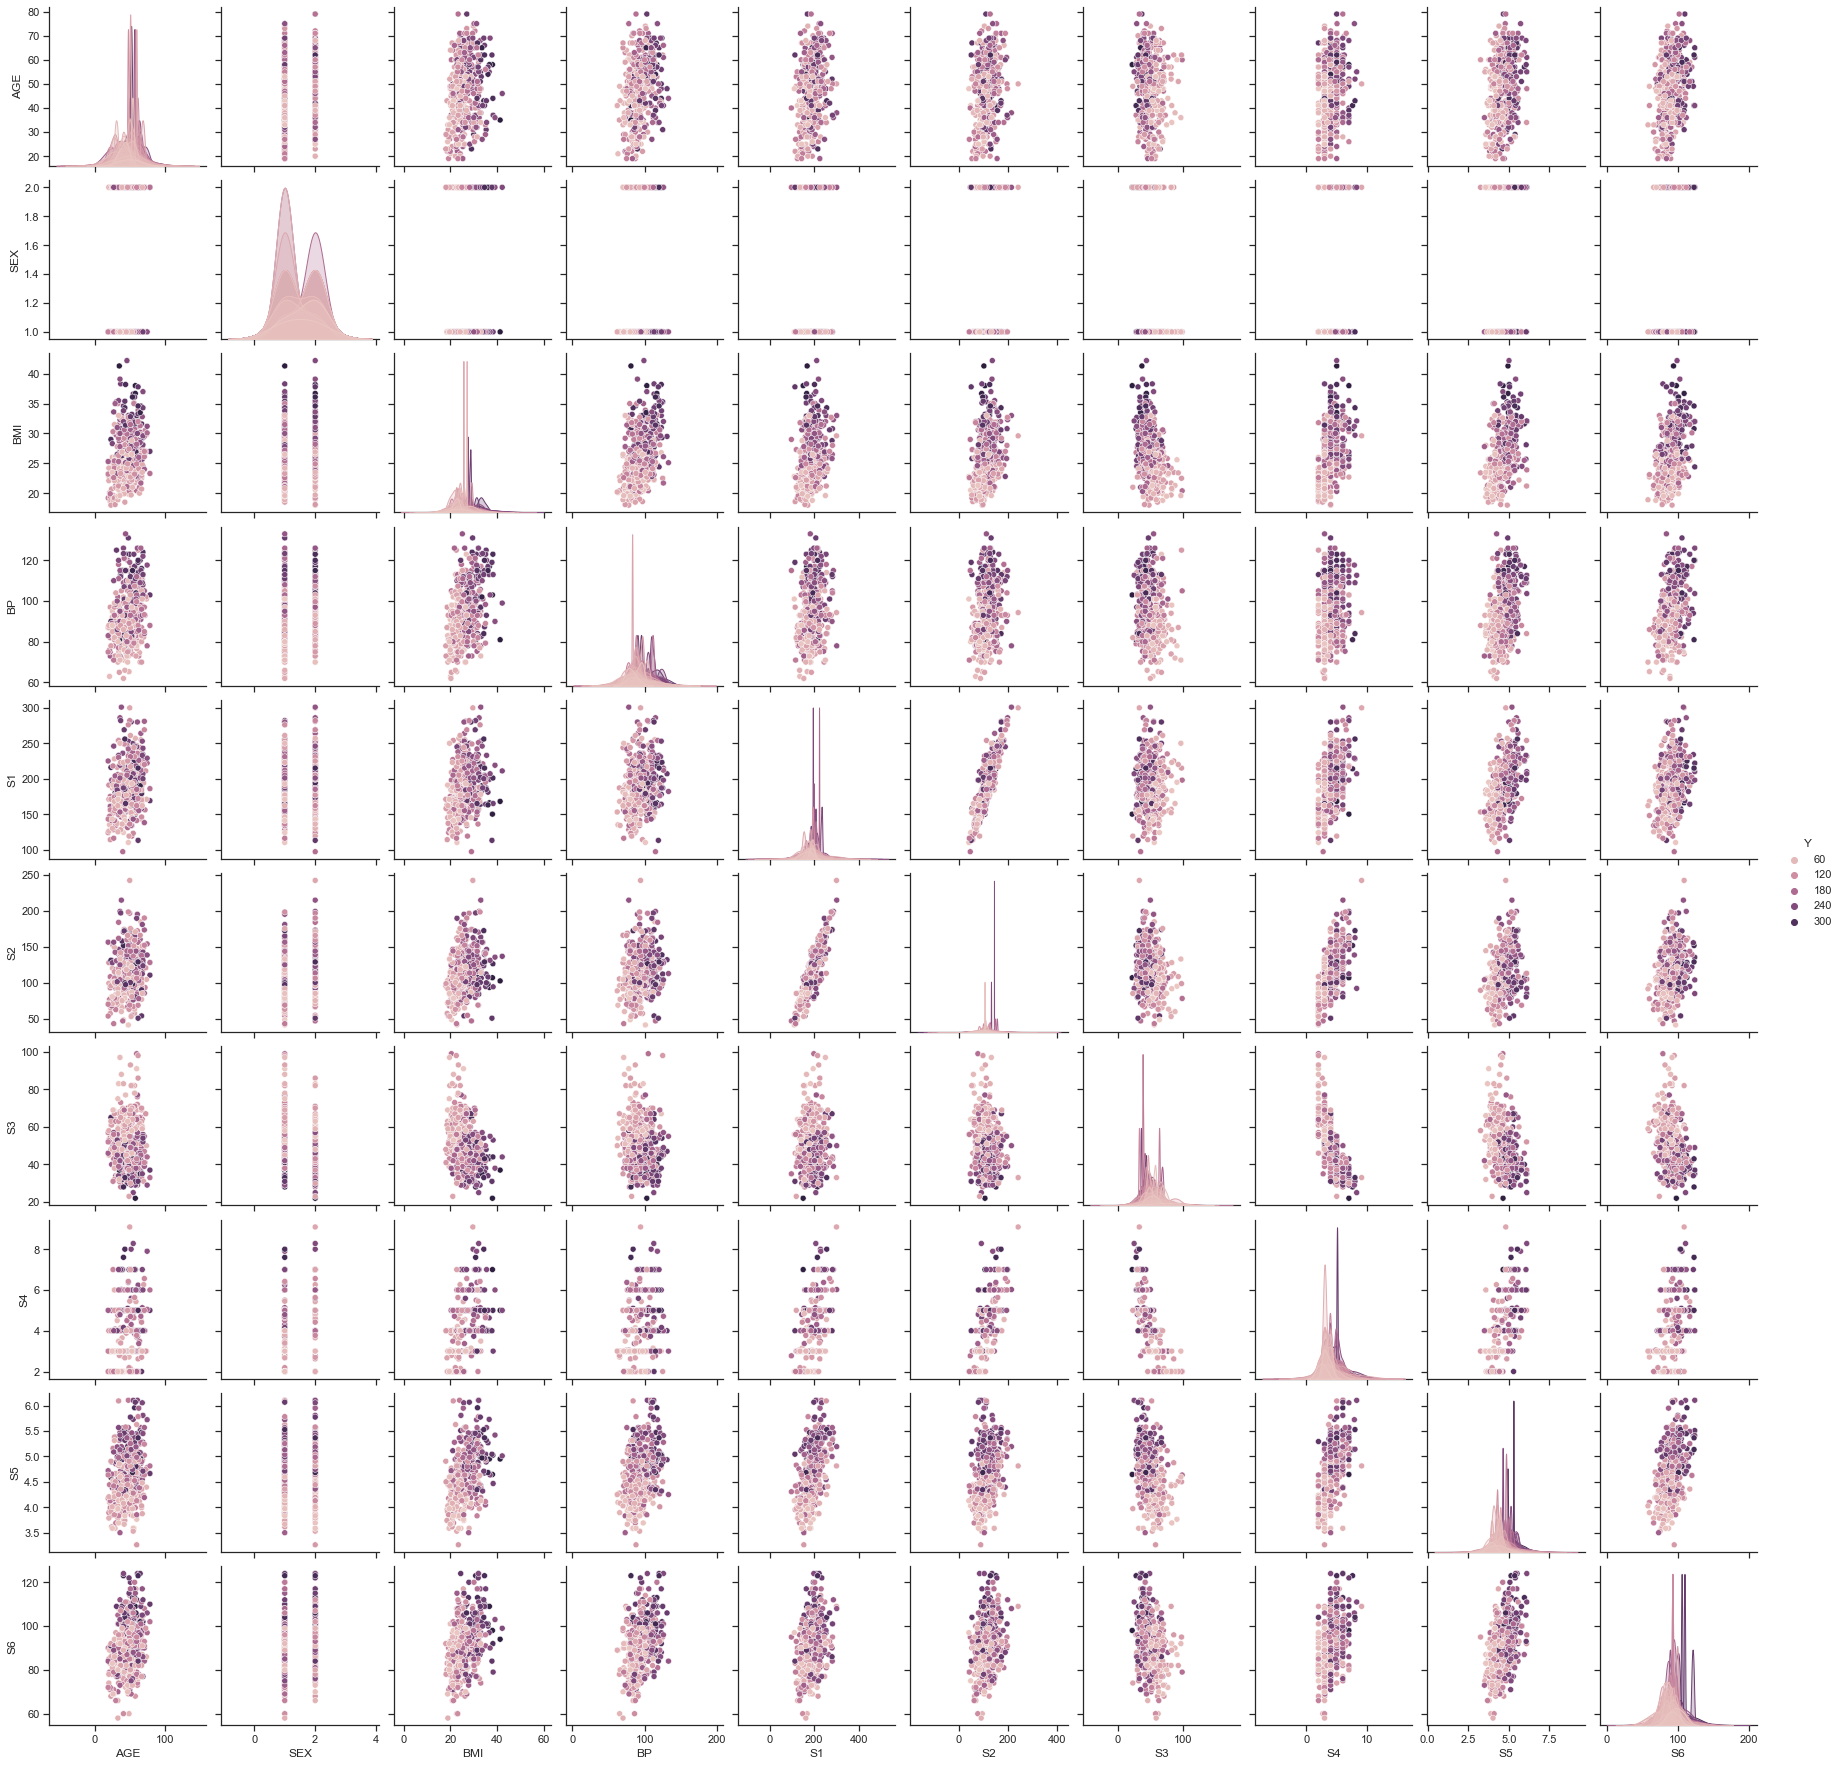

In [68]:
sns.pairplot(data, hue="Y")

### [Ящик с усами](https://en.wikipedia.org/wiki/Box_plot)


<AxesSubplot:xlabel='SEX', ylabel='BP'>

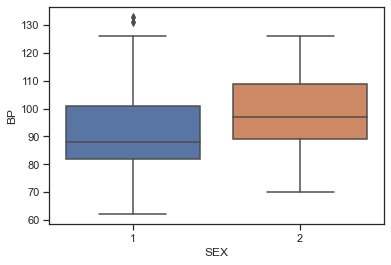

In [69]:
# Распределение параметра Humidity сгруппированные по Occupancy.
sns.boxplot(x='SEX', y='BP', data=data)

Это показывает, что у женщин давление в среднем чуть выше, чем у мужчин, хоть и несущественно

### [Violin plot](https://en.wikipedia.org/wiki/Violin_plot)


<AxesSubplot:xlabel='SEX', ylabel='BP'>

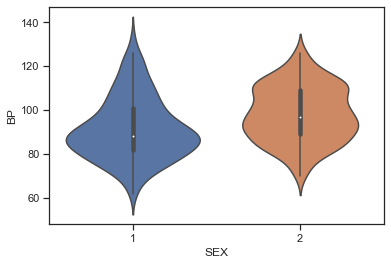

In [70]:
# Распределение параметра Humidity сгруппированные по Occupancy.
sns.violinplot(x='SEX', y='BP', data=data)

# 4) Информация о корреляции признаков

In [71]:
data.corr()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
AGE,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731,0.187889
SEX,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133,0.043062
BMI,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680,0.586450
BP,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430,0.441482
S1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717,0.212022
S2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600,0.174054
S3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
S4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212,0.430453
S5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669,0.565883
S6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000,0.382483


На основе корреляционной матрицы можно сделать следующие выводы:
- У целевого признака нет ярко выраженной корреляции с каким-либо признаком
- Целевой признак наиболее сильно коррелирует с индексом массы тела (0.59) и 5 измерением сыворотки (0.57).
- Целевой признак слабо коррелирует с полом (0.04) и 3 измерением сыворотки (-0.39). Скорее всего эти признаки стоит исключить из модели, возможно они только ухудшат качество модели.
- S1 и S2 сильно коррелируют между собой (0.9).
- S3 и S4 также имеют немалую отрицательную корелляцию (-0.738)
- Больше сильных корреляций не выявлено.

<AxesSubplot:>

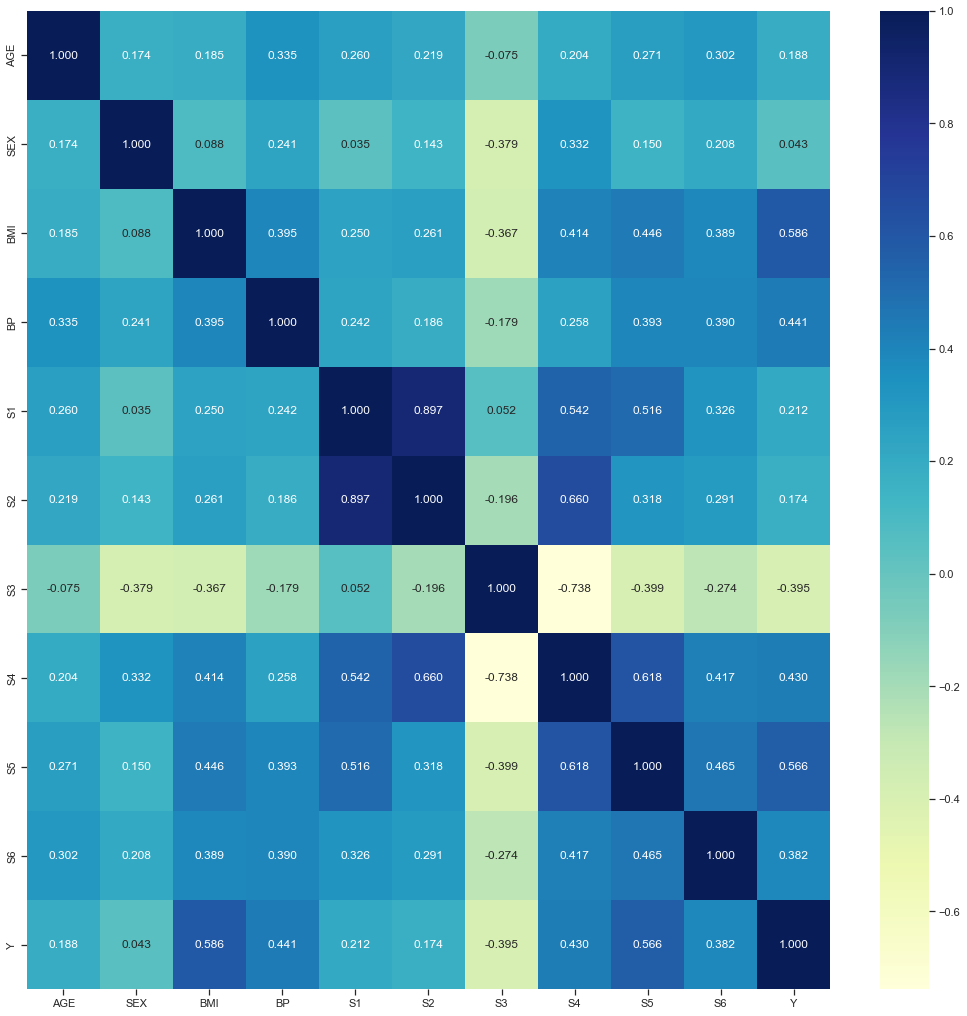

In [86]:
# Изменение цветовой гаммы
fig, ax = plt.subplots(1, 1, sharex='col', sharey='row', figsize=(18,18))
sns.heatmap(data.corr(), cmap='YlGnBu', annot=True, fmt='.3f')

Здесь мы можем видеть те же рез-ты что и выше. Явная корреляция присутствует у S1 и S2, у S3 и S4. У целевого же признака она отсутствует, что говорит о том, что на целевой признак влияет группа факторов